In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import read
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Importing the survey dataset ###

In [3]:
# Load the CSV file into a DataFrame `df`
df = pd.read_csv('Futuro semplice_ LavorerAI (Risposte) - Risposte del modulo 1.csv')

# Create a copy of the original DataFrame for backup purposes
original_df = df.copy()

# Select all columns with object data type (commonly used for strings)
numeric_object_columns = df.select_dtypes(include='object').columns

# Iterate through each column with object type
for col in numeric_object_columns:
    # Check if all values in the column are numeric (as strings)
    if df[col].str.isnumeric().all():
        # Convert the column to integer type if all values are numeric
        df[col] = df[col].astype(int)


#### Check of numerical columns ####

In [4]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the number of unique values in the column is less than 7
    if len(df[column].unique()) < 7:
        # Print the column name and its data type if the condition is met
        print(f"Column: {column}, {df[column].dtype}")

Column: Qual è la tua conoscenza dell'Intelligenza Artificiale? , int64
Column: Come ti tieni aggiornato/a sull'AI? [Social Media], object
Column: Come ti tieni aggiornato/a sull'AI? [Articoli scientifici], object
Column: Come ti tieni aggiornato/a sull'AI? [Notizie], object
Column: Come ti tieni aggiornato/a sull'AI? [Corsi/Formazione], object
Column: Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Intelligenza artificiale], object
Column: Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Intelligenza artificiale generativa], object
Column: Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Machine Learning (ML)], object
Column: Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Deep Learning (DL)], object
Column: Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Large Language Model (LLM)], object
Column: Quanto pensi sia importante capire come funziona l'

##### Let's rename columns for readability purpose #####

In [5]:
def rename_columns(df, rename_dict):
    """
    Rename columns in a DataFrame based on a dictionary mapping.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    rename_dict (dict): A dictionary where keys are current column names and values are new column names.

    Returns:
    pd.DataFrame: A DataFrame with updated column names.
    """
    # Validate that keys in rename_dict exist in the DataFrame
    missing_columns = [col for col in rename_dict.keys() if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are not present in the DataFrame: {missing_columns}")

    # Rename the columns using the dictionary
    df = df.rename(columns=rename_dict)
    return df

In [6]:
rename_dict = {
    "Qual è la tua conoscenza dell'Intelligenza Artificiale? ": "ai_knowledge",
    "Come ti tieni aggiornato/a sull'AI? [Social Media]": "from_social_media",
    "Come ti tieni aggiornato/a sull'AI? [Articoli scientifici]": "from_papers",
    "Come ti tieni aggiornato/a sull'AI? [Notizie]": "from_news",
    "Come ti tieni aggiornato/a sull'AI? [Corsi/Formazione]": "from_courses",
    "Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Intelligenza artificiale]": "AI_knowledge_1",
    "Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Intelligenza artificiale generativa]": "generative_AI_knowledge",
    "Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Machine Learning (ML)]": "ML_knowledge",
    "Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Deep Learning (DL)]": "DL_knowledge",
    "Per ciascuno dei seguenti termini indica quanto conosci il suo significato [Large Language Model (LLM)]": "LLM_knowledge",
    "Quanto pensi sia importante capire come funziona l'AI per poterla utilizzare in modo efficace? ": "use_to_knowledge",
    "L'AI viene addestrata principalmente su dati creati da esseri umani. Quale pensi sia l'impatto più significativo di questo processo sui risultati generati? [L'AI riproduce e amplifica i pregiudizi presenti nei dati di addestramento umani]": "human_bias_strength",
    "L'AI viene addestrata principalmente su dati creati da esseri umani. Quale pensi sia l'impatto più significativo di questo processo sui risultati generati? [L'AI tende a essere più conservativa, limitandosi a ricombinare pattern esistenti invece di creare vera novità]": "ai_boredom",
    "L'AI viene addestrata principalmente su dati creati da esseri umani. Quale pensi sia l'impatto più significativo di questo processo sui risultati generati? [L'AI rischia di perdere prospettive minoritarie poco rappresentate nei dati]": "ai_minority_underrapresentation",
    "L'AI viene addestrata principalmente su dati creati da esseri umani. Quale pensi sia l'impatto più significativo di questo processo sui risultati generati? [L'AI potrebbe sviluppare una visione distorta della realtà basata su contenuti online non rappresentativi]": "ai_reality_distortion",
    """L'AI viene addestrata principalmente su dati creati da esseri umani. Quale pensi sia l'impatto più significativo di questo processo sui risultati generati? [L'AI può rafforzare le tendenze dominanti presenti nei dati, creando un effetto "bolla"]""": "data_bias",
    """Considerando che l'AI può anche imparare dai propri output (fenomeno noto come "AI feedback loop"), quanto ti preoccupano questi scenari? [L'AI potrebbe allontanarsi gradualmente dalla comprensione della realtà umana]""": "ai_human_comprehension_distance",
    """Considerando che l'AI può anche imparare dai propri output (fenomeno noto come "AI feedback loop"), quanto ti preoccupano questi scenari? [I bias iniziali potrebbero venire amplificati esponenzialmente]""": "ai_feefback_loop_bias",
    """Considerando che l'AI può anche imparare dai propri output (fenomeno noto come "AI feedback loop"), quanto ti preoccupano questi scenari? [L'AI potrebbe sviluppare pattern comportamentali sempre più artificiali]""": "ai_artificial_patterns",
    """Considerando che l'AI può anche imparare dai propri output (fenomeno noto come "AI feedback loop"), quanto ti preoccupano questi scenari? [La diversità dei contenuti generati potrebbe diminuire progressivamente]""": "ai_loss_of_diversity",
    "Quanto pensi che l'AI attuale simuli bene il ragionamento umano?": "ai_human_reasoning_simulation",

    # AI Tools
    "Con quali strumenti di AI hai interagito? [Chatbot conversazionali (es. ChatGPT per scrivere testi, rispondere a domande, aiuto nella programmazione)]": "tool_chatbots",
    "Con quali strumenti di AI hai interagito? [Generatori di immagini AI (es. DALL-E per creare arte, Midjourney per design, Photoshop AI per modificare foto)]": "tool_image_generation",
    "Con quali strumenti di AI hai interagito? [Assistenti vocali (es. Siri di Apple, Alexa di Amazon, Google Assistant per comandi vocali)]": "tool_voice_assistants",
    "Con quali strumenti di AI hai interagito? [Strumenti di produttività (es. Gmail Smart Compose per completamento email, Grammarly per correzione testi)]": "tool_productivity",
    "Con quali strumenti di AI hai interagito? [Sistemi di raccomandazione (es. Netflix per film consigliati, Spotify per playlist personalizzate, Amazon per prodotti)]": "tool_recommendation",

    # Scopes
    "Per quali scopi lo hai utilizzato?  [Generazione di Testo (copywriting, scrittura di articoli, descrizioni di prodotti, email)]": "purpose_text_generation",
    "Per quali scopi lo hai utilizzato?  [Assistenza Virtuale e Customer Support]": "purpose_customer_support",
    "Per quali scopi lo hai utilizzato?  [Traduzione]": "purpose_translation",
    "Per quali scopi lo hai utilizzato?  [Analisi e Sintesi di Testi]": "purpose_text_analysis_synthesis",
    "Per quali scopi lo hai utilizzato?  [Educazione e Formazione]": "purpose_education",
    "Per quali scopi lo hai utilizzato?  [Generazione di Codice e Programmazione]": "purpose_code_generation",
    "Per quali scopi lo hai utilizzato?  [Ricerca e Sperimentazione]": "purpose_research_experimentation",
    "Per quali scopi lo hai utilizzato?  [Creatività e Intrattenimento]": "purpose_creativity_entertainment",
    "Per quali scopi lo hai utilizzato?  [Analisi Dati e Previsioni]": "purpose_data_analysis_forecasting",
    "Per quali scopi lo hai utilizzato?  [Consulenza professionale (legale, medica, finanziaria, psicologica ecc...)]": "purpose_professional_consulting",

    # Payments
    "Ti è capitato di pagare per uno strumento AI?": "paid_for_ai_tool",
    "Se sei abbonato, quanto paghi mensilmente per i servizi di AI?": "monthly_ai_sub_cost",

    # Most used AI
    "Qual è l'AI che maggiormente utilizzi? [ChatGPT (OpenAI)]": "most_used_ai_chatgpt",
    "Qual è l'AI che maggiormente utilizzi? [Claude (Anthropic)]": "most_used_ai_claude",
    "Qual è l'AI che maggiormente utilizzi? [Mistral]": "most_used_ai_mistral",
    "Qual è l'AI che maggiormente utilizzi? [Gemini (Google)]": "most_used_ai_gemini",
    "Qual è l'AI che maggiormente utilizzi? [LLaMA (Meta)]": "most_used_ai_llama",
    "Qual è l'AI che maggiormente utilizzi? [Copilot (Microsoft)]": "most_used_ai_copilot",
    "Qual è l'AI che maggiormente utilizzi? [Grok (X, ex Twitter)]": "most_used_ai_grok",

    # Pros
    "Vantaggi AI [Ottimizzazione del tempo]": "benefit_time_optimization",
    "Vantaggi AI [Espansione della conoscenza]": "benefit_knowledge_expansion",
    "Vantaggi AI [Sviluppo di competenze]": "benefit_skills_development",
    "Vantaggi AI [Prospettive e idee diverse/Creatività aumentata]": "benefit_creativity",
    "Vantaggi AI [Precisione e riduzione degli errori]": "benefit_accuracy",

    # Cons
    "Svantaggi dell'AI, quanto pensi possano impattare? [Perdita di posti di lavoro]": "disadv_job_loss",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Perdita della privacy]": "disadv_privacy_loss",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Concentrazione di potere]": "disadv_power_concentration",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Bias e discriminazioni]": "disadv_bias_discrimination",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Trasparenza algoritmica (Black Box)]": "disadv_algorithmic_transparency",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Dipendenza tecnologica]": "disadv_tech_dependency",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Superintelligenza(AI con coscienza)]": "disadv_superintelligence",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Deepfake e disinformazione]": "disadv_deepfake_disinfo",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Relazioni umane]": "disadv_human_relationships",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Competenze umane]": "disadv_human_skills",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Decisioni automatizzate]": "disadv_automated_decisions",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Impatto ambientale]": "disadv_environmental_impact",
    "Svantaggi dell'AI, quanto pensi possano impattare? [Utilizzo militare]": "disadv_military_use",

    # Sectors that will benefit
    "Settori che beneficieranno dell'AI  [Servizio clienti e call center]": "sector_customer_service",
    "Settori che beneficieranno dell'AI  [Data entry e amministrazione di base]": "sector_data_entry",
    "Settori che beneficieranno dell'AI  [Giornalismo]": "sector_journalism",
    "Settori che beneficieranno dell'AI  [Settore della produzione manifatturiera]": "sector_manufacturing",
    "Settori che beneficieranno dell'AI  [Trasporti e logistica (autisti, magazzinieri)]": "sector_transport_logistics",
    "Settori che beneficieranno dell'AI  [Sanità (diagnostica)]": "sector_healthcare",
    "Settori che beneficieranno dell'AI  [Educazione]": "sector_education",
    "Settori che beneficieranno dell'AI  [Grafica e design]": "sector_graphics_design",
    "Settori che beneficieranno dell'AI  [Traduttori]": "sector_translation",
    "Settori che beneficieranno dell'AI  [Pubblicità e marketing digitale]": "sector_digital_marketing",
    "Settori che beneficieranno dell'AI  [Contabilità]": "sector_accounting",
    "Settori che beneficieranno dell'AI  [Assistenza legale e revisione contratti]": "sector_legal",
    "Settori che beneficieranno dell'AI  [Settore retail (vendita al dettaglio)]": "sector_retail",
    "Settori che beneficieranno dell'AI  [Risorse umane]": "sector_human_resources",
    "Settori che beneficieranno dell'AI  [Produzione musicale e audio]": "sector_music_production",
    "Settori che beneficieranno dell'AI  [Programmatore]": "sector_programming",
    "Settori che beneficieranno dell'AI  [Intrattenimento]": "sector_entertainment",
    "Settori che beneficieranno dell'AI  [Sicurezza]": "sector_security",
    "Settori che beneficieranno dell'AI  [Finanza]": "sector_finance",
    "Settori che beneficieranno dell'AI  [Fitness]": "sector_fitness",
    "Settori che beneficieranno dell'AI  [Caregiving]": "sector_caregiving",

    # AI Boss
    "Sul lavoro, ti faresti dare volentieri istruzioni da un'AI?": "work_instructions_from_ai",

    # Roles at Risk
    "Ruoli lavorativi a rischio sostituzione [Servizio clienti e call center]": "role_risk_customer_service",
    "Ruoli lavorativi a rischio sostituzione [Data entry e amministrazione di base]": "role_risk_data_entry",
    "Ruoli lavorativi a rischio sostituzione [Giornalismo]": "role_risk_journalism",
    "Ruoli lavorativi a rischio sostituzione [Settore della produzione manifatturiera]": "role_risk_manufacturing",
    "Ruoli lavorativi a rischio sostituzione [Trasporti e logistica (autisti, magazzinieri)]": "role_risk_transport_logistics",
    "Ruoli lavorativi a rischio sostituzione [Sanità (diagnostica)]": "role_risk_healthcare",
    "Ruoli lavorativi a rischio sostituzione [Educazione]": "role_risk_education",
    "Ruoli lavorativi a rischio sostituzione [Grafica e design]": "role_risk_graphics_design",
    "Ruoli lavorativi a rischio sostituzione [Traduttori]": "role_risk_translation",
    "Ruoli lavorativi a rischio sostituzione [Pubblicità e marketing digitale]": "role_risk_digital_marketing",
    "Ruoli lavorativi a rischio sostituzione [Contabilità]": "role_risk_accounting",
    "Ruoli lavorativi a rischio sostituzione [Assistenza legale e revisione contratti]": "role_risk_legal",
    "Ruoli lavorativi a rischio sostituzione [Settore retail (vendita al dettaglio)]": "role_risk_retail",
    "Ruoli lavorativi a rischio sostituzione [Risorse umane]": "role_risk_human_resources",
    "Ruoli lavorativi a rischio sostituzione [Produzione musicale e audio]": "role_risk_music_production",
    "Ruoli lavorativi a rischio sostituzione [Programmatore]": "role_risk_programming",
    "Ruoli lavorativi a rischio sostituzione [Intrattenimento]": "role_risk_entertainment",
    "Ruoli lavorativi a rischio sostituzione [Sicurezza]": "role_risk_security",
    "Ruoli lavorativi a rischio sostituzione [Fitness]": "role_risk_fitness",
    "Ruoli lavorativi a rischio sostituzione [Caregiving]": "role_risk_caregiving",

    # Legal Responsibility
    "Chi dovrebbe essere responsabile legalmente per gli errori commessi da un sistema AI?  [Diagnosi mediche critiche]": "liability_medical_diagnosis",
    "Chi dovrebbe essere responsabile legalmente per gli errori commessi da un sistema AI?  [Guida autonoma]": "liability_autonomous_driving",
    "Chi dovrebbe essere responsabile legalmente per gli errori commessi da un sistema AI?  [Decisioni giudiziarie]": "liability_judicial_decisions",
    "Chi dovrebbe essere responsabile legalmente per gli errori commessi da un sistema AI?  [Approvazione prestiti/mutui]": "liability_loan_approval",
    "Chi dovrebbe essere responsabile legalmente per gli errori commessi da un sistema AI?  [Assunzioni e licenziamenti]": "liability_hiring_firing",
    "Chi dovrebbe essere responsabile legalmente per gli errori commessi da un sistema AI?  [Valutazione studenti/esami]": "liability_student_evaluation",

    # Deepfake and Security
    "Quanto pensi che l'essere umano sarà in grado di mantenere il controllo sui sistemi AI considerando il problema delle black box*?": "ai_black_box_control",
    """L'immagine sotto riportata, ritrae un calciatore molto famoso, l'immagine è stata creata con il modello AI Grok 2 di X come descritto dal watermark** in basso a destra.\r\nQuanto ti preoccupa il fenomeno del deepfake*** o della disinformazione?""": "concern_deepfake_disinfo",

    # AI Regularization
    "Considerati i potenziali rischi legati all'AI, quanto dovrebbe essere intenso l’intervento delle istituzioni nel monitorarne gli sviluppi? ": "institutional_intervention",
    "Come descriveresti, in generale, la tua esperienza con questo tipo di tecnologia? Ti senti più aiutato o più minacciato? (Scala da 1 a 5: 1 = molto minacciato, 5 = molto aiutato) ": "overall_experience",

    # Demographics
    "Età: ": "age",
    "Genere:": "gender",
    "Livello di istruzione: ": "education_level",
    "Occupazione attuale: ": "current_occupation",
    "Area Geografica di residenza:": "geographic_area",
}


In [7]:
renamed_df = rename_columns(df, rename_dict)

#### Creating numerical variables from categorical scale variables ####

In [8]:
scale_mapping_1 = {
    "Mai": 1,
    "Raramente": 2,
    "Occasionalmente": 3,
    "Frequentemente": 4,
    "Molto frequentemente": 5
}
scale_mapping_2 = {
    "Non lo conosco affatto": 1,
    "Lo conosco vagamente": 2,
    "Lo conosco in modo basilare": 3,
    "Lo conosco bene": 4,
    "Lo conosco approfonditamente": 5
}
scale_mapping_3 = {
    "Minimo": 1,
    "Limitato": 2,
    "Moderato": 3,
    "Significativo": 4,
    "Massimo": 5
}
scale_mapping_4 = {
    "Per nulla": 1,
    "Poco": 2,
    "Moderatamente": 3,
    "Molto": 4,
    "Estremamente": 5
}
scale_mapping_5 = {
    "Mai": 1,
    "Raramente": 2,
    "Qualche volta": 3,
    "Spesso": 4,
    "Sempre": 5
}
scale_mapping_6 = {
    "Mai": 1,
    "Qualche volta, quando mi serve o per curiosità": 2,
    "Sono abbonato a un solo servizio": 3,
    "Sono abbonato a più servizi": 4
}
scale_mapping_7 = {
    "Non pago/Preferisco non rispondere": 1,
    "Meno di 30€": 2,
    "30€-50€": 3,
    "50€-100€": 4,
    "+100€":5
}
scale_mapping_8 = {
    "Minimi": 1,
    "Moderati": 2,
    "Buoni": 3,
    "Significativi": 4,
    "Eccezionali": 5
}
scale_mapping_9 = {
    "Per nulla": 1,
    "Poco": 2,
    "Moderatamente": 3,
    "Gravemente": 4,
    "Impatto critico": 5
}
scale_mapping_10 = {
    "Minimo": 1,
    "Moderato": 2,
    "Buono": 3,
    "Significativo": 4,
    "Eccezionale": 5
}
scale_mapping_11 = {
    "Rischio minimo": 1,
    "Rischio basso": 2,
    "Rischio moderato": 3,
    "Rischio alto": 4,
    "Rischio critico": 5
}
scale_mapping_age = {
    "Meno di 18 anni": 1,
    "18-24 anni": 2,
    "25-34 anni": 3,
    "35-44 anni": 4,
    "45-54 anni": 5,
    "55-64 anni": 6,
    "65+ anni": 7
}
scale_mapping_academy = {
    "Nessun titolo di studio": 0,
    "Scuola primaria": 1,
    "Scuola secondaria inferiore (Medie)": 3,
    "Scuola secondaria superiore (Liceo, Istituto tecnico)": 4,
    "Laurea triennale": 5,
    "Laurea magistrale/Master": 6,
    "Dottorato di ricerca": 7
}

In [9]:
root_mapping = {
    "from_social_media": scale_mapping_1,
    "from_papers": scale_mapping_1,
    "from_news": scale_mapping_1,
    "from_courses": scale_mapping_1,
    "AI_knowledge_1": scale_mapping_2,
    "generative_AI_knowledge": scale_mapping_2,
    "ML_knowledge": scale_mapping_2,
    "DL_knowledge": scale_mapping_2,
    "LLM_knowledge": scale_mapping_2,
    "human_bias_strength": scale_mapping_3,
    "ai_boredom": scale_mapping_3,
    "ai_minority_underrapresentation": scale_mapping_3,
    "ai_reality_distortion": scale_mapping_3,
    "data_bias": scale_mapping_3,
    "ai_human_comprehension_distance": scale_mapping_4,
    "ai_feefback_loop_bias": scale_mapping_4,
    "ai_artificial_patterns": scale_mapping_4,
    "ai_loss_of_diversity": scale_mapping_4,
    "tool_chatbots": scale_mapping_5,
    "tool_image_generation": scale_mapping_5,
    "tool_voice_assistants": scale_mapping_5,
    "tool_productivity": scale_mapping_5,
    "tool_recommendation": scale_mapping_5,
    "purpose_text_generation": scale_mapping_5,
    "purpose_customer_support": scale_mapping_5,
    "purpose_translation": scale_mapping_5,
    "purpose_text_analysis_synthesis": scale_mapping_5,
    "purpose_education": scale_mapping_5,
    "purpose_code_generation": scale_mapping_5,
    "purpose_research_experimentation": scale_mapping_5,
    "purpose_creativity_entertainment": scale_mapping_5,
    "purpose_data_analysis_forecasting": scale_mapping_5,
    "purpose_professional_consulting": scale_mapping_5,
    "paid_for_ai_tool": scale_mapping_6,
    "monthly_ai_sub_cost": scale_mapping_7,
    "most_used_ai_chatgpt": scale_mapping_5,
    "most_used_ai_claude": scale_mapping_5,
    "most_used_ai_mistral": scale_mapping_5,
    "most_used_ai_gemini": scale_mapping_5,
    "most_used_ai_llama": scale_mapping_5,
    "most_used_ai_copilot": scale_mapping_5,
    "most_used_ai_grok": scale_mapping_5,
    "benefit_time_optimization": scale_mapping_8,
    "benefit_knowledge_expansion": scale_mapping_8,
    "benefit_skills_development": scale_mapping_8,
    "benefit_creativity": scale_mapping_8,
    "benefit_accuracy": scale_mapping_8,
    "disadv_job_loss": scale_mapping_9,
    "disadv_privacy_loss": scale_mapping_9,
    "disadv_power_concentration": scale_mapping_9,
    "disadv_bias_discrimination": scale_mapping_9,
    "disadv_algorithmic_transparency": scale_mapping_9,
    "disadv_tech_dependency": scale_mapping_9,
    "disadv_superintelligence": scale_mapping_9,
    "disadv_deepfake_disinfo": scale_mapping_9,
    "disadv_human_relationships": scale_mapping_9,
    "disadv_human_skills": scale_mapping_9,
    "disadv_automated_decisions": scale_mapping_9,
    "disadv_environmental_impact": scale_mapping_9,
    "disadv_military_use": scale_mapping_9,
    "sector_customer_service": scale_mapping_10,
    "sector_data_entry": scale_mapping_10,
    "sector_journalism": scale_mapping_10,
    "sector_manufacturing": scale_mapping_10,
    "sector_transport_logistics": scale_mapping_10,
    "sector_healthcare": scale_mapping_10,
    "sector_education": scale_mapping_10,
    "sector_graphics_design": scale_mapping_10,
    "sector_translation": scale_mapping_10,
    "sector_digital_marketing": scale_mapping_10,
    "sector_accounting": scale_mapping_10,
    "sector_legal": scale_mapping_10,
    "sector_retail": scale_mapping_10,
    "sector_human_resources": scale_mapping_10,
    "sector_music_production": scale_mapping_10,
    "sector_programming": scale_mapping_10,
    "sector_entertainment": scale_mapping_10,
    "sector_security": scale_mapping_10,
    "sector_finance": scale_mapping_10,
    "sector_fitness": scale_mapping_10,
    "sector_caregiving": scale_mapping_10,
    "work_instructions_from_ai": scale_mapping_1,
    "role_risk_customer_service": scale_mapping_11,
    "role_risk_data_entry": scale_mapping_11,
    "role_risk_journalism": scale_mapping_11,
    "role_risk_manufacturing": scale_mapping_11,
    "role_risk_transport_logistics": scale_mapping_11,
    "role_risk_healthcare": scale_mapping_11,
    "role_risk_education": scale_mapping_11,
    "role_risk_graphics_design": scale_mapping_11,
    "role_risk_translation": scale_mapping_11,
    "role_risk_digital_marketing": scale_mapping_11,
    "role_risk_accounting": scale_mapping_11,
    "role_risk_legal": scale_mapping_11,
    "role_risk_retail": scale_mapping_11,
    "role_risk_human_resources": scale_mapping_11,
    "role_risk_music_production": scale_mapping_11,
    "role_risk_programming": scale_mapping_11,
    "role_risk_entertainment": scale_mapping_11,
    "role_risk_security": scale_mapping_11,
    "role_risk_fitness": scale_mapping_11,
    "role_risk_caregiving": scale_mapping_11,
    "liability_medical_diagnosis": scale_mapping_11,
    "liability_autonomous_driving": scale_mapping_11,
    "liability_judicial_decisions": scale_mapping_11,
    "liability_loan_approval": scale_mapping_11,
    "liability_hiring_firing": scale_mapping_11,
    "liability_student_evaluation": scale_mapping_11,
    "ai_black_box_control": scale_mapping_1,
    "concern_deepfake_disinfo": scale_mapping_1,
    "institutional_intervention": scale_mapping_1,
    "overall_experience": scale_mapping_1,
    "age": scale_mapping_age,
    "education_level": scale_mapping_academy,
}


In [10]:
def apply_scale_mappings(df, root_mapping):
    """
    Apply scale mappings to columns in the DataFrame based on the root_mapping.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the columns to map.
    - root_mapping (dict): A dictionary where keys are column names in the DataFrame,
                           and values are the corresponding scale mappings to apply.

    Returns:
    - pd.DataFrame: The DataFrame with mapped values.
    """
    for column, scale_mapping in root_mapping.items():
        if column in df.columns:
            df[column] = df[column].map(scale_mapping).fillna(df[column])
    return df


### Transforming categorical data in numerical data

In [11]:
df_mapped = apply_scale_mappings(renamed_df, root_mapping)

In [12]:
df_numeric = df_mapped.select_dtypes(include=['number'])
df_numeric.to_csv("df_numeric.csv", index=False)

## PCA ##

### Standardizer ###

In [13]:
def standardize(df):
    return df.apply(lambda x: (x - x.mean()) / x.std())

In [14]:
import pandas as pd

df_numeric = pd.read_csv("df_numeric.csv")
df_numeric.drop(columns=['age', 'education_level'], inplace=True)

df_standardized = standardize(df_numeric)

In [15]:
cov_mat = df_standardized.cov()

(92, 92)


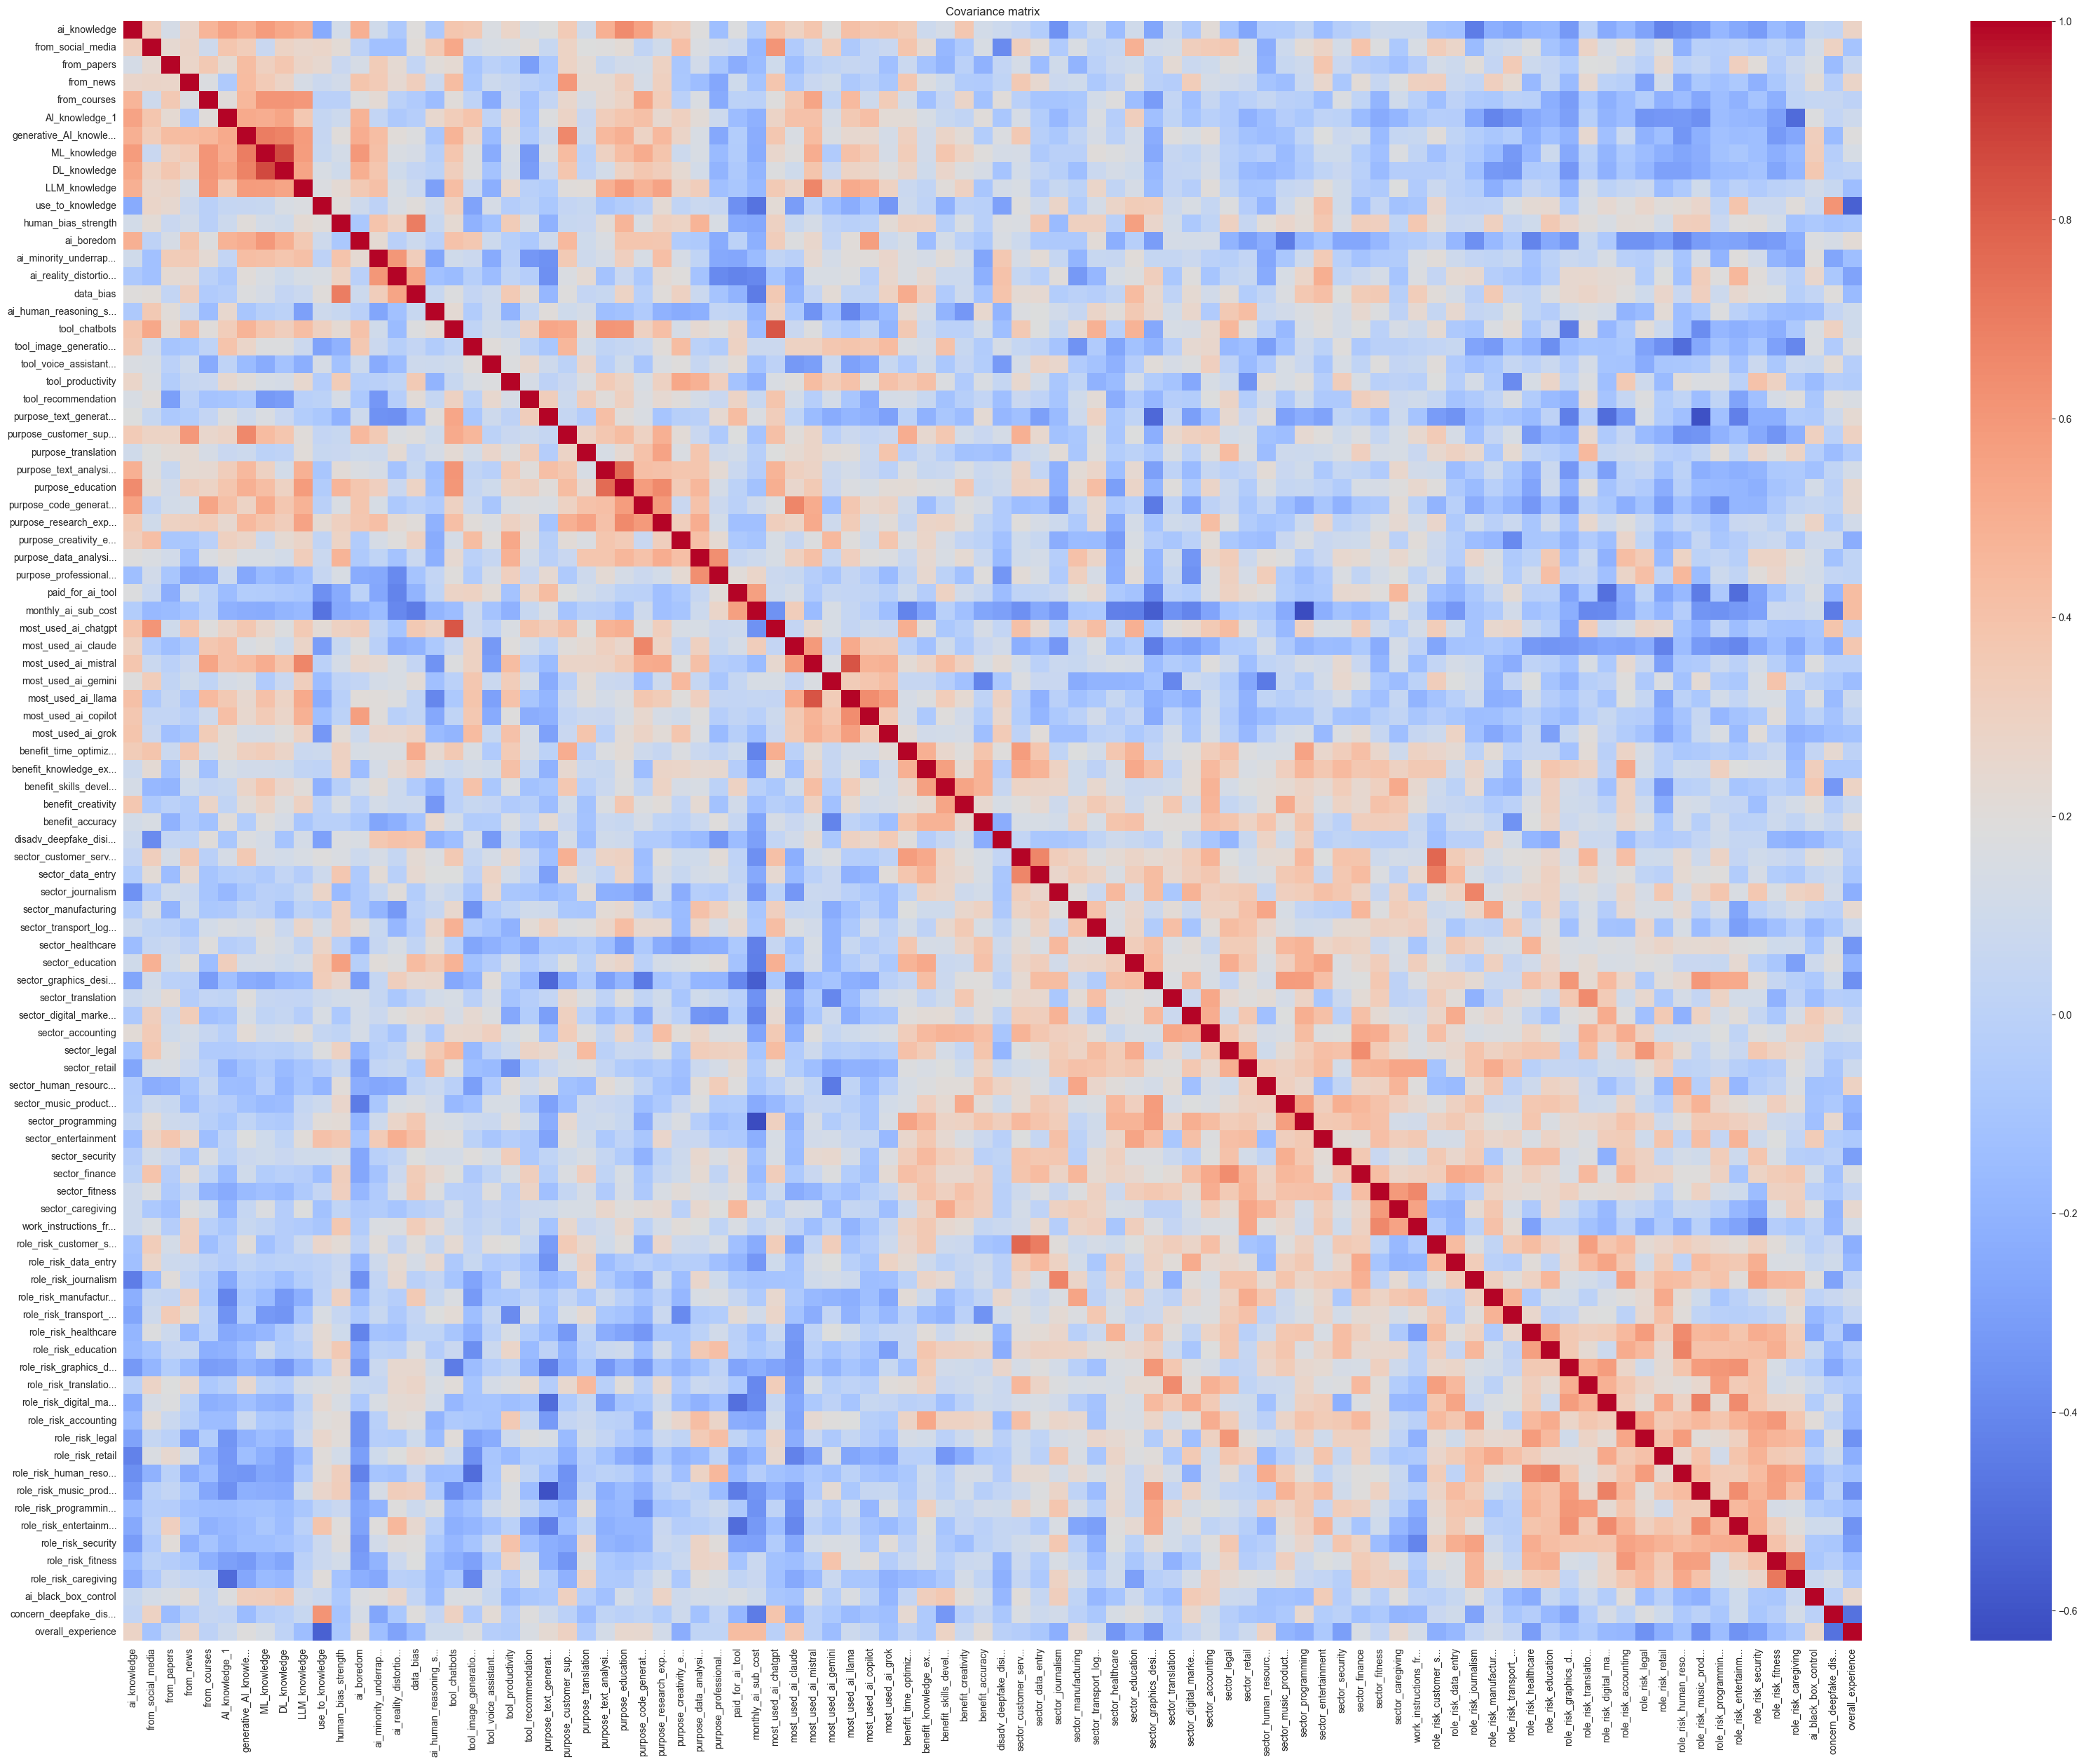

Max: 0.8637004160435884
Min:  -0.6300552292461511


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

print(cov_mat.shape)
short_labels = [col[:20] + "..." if len(col) > 20 else col for col in cov_mat.columns]
plt.figure(figsize=(40, 30))
sns.heatmap(cov_mat, cmap="coolwarm", xticklabels=short_labels, yticklabels=short_labels)
plt.title("Covariance matrix")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

max_below_one = cov_mat.values[cov_mat.values < 0.99].max()
print("Max:", max_below_one)
print("Min: ", cov_mat.values.min())



## PCA ##

### Calculating Number of components ###

In [17]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]

variance_explained = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(variance_explained)

threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Needed amount of components: {n_components}")

Needed amount of components: 25


### PCA ###

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Step 2: Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Step 4: Contribution of each feature to each component
loadings = pca.components_

# Print explained variance
print("Explained variance ratio for each component:")
for i, var in enumerate(explained_variance):
    print(f"Component {i+1}: {var:.4f}")

# Print contributions (loadings) of each feature to each component
print("\nContributions of each feature to each component (loadings):")
loading_df = pd.DataFrame(loadings, columns=df_numeric.columns)
print(loading_df)

Explained variance ratio for each component:
Component 1: 0.1469
Component 2: 0.1275
Component 3: 0.0772
Component 4: 0.0659
Component 5: 0.0536
Component 6: 0.0468
Component 7: 0.0440
Component 8: 0.0425
Component 9: 0.0370
Component 10: 0.0343
Component 11: 0.0305
Component 12: 0.0282
Component 13: 0.0276
Component 14: 0.0242
Component 15: 0.0236
Component 16: 0.0217
Component 17: 0.0191
Component 18: 0.0172
Component 19: 0.0166
Component 20: 0.0159
Component 21: 0.0138
Component 22: 0.0125
Component 23: 0.0118
Component 24: 0.0113
Component 25: 0.0099
Component 26: 0.0096
Component 27: 0.0086
Component 28: 0.0074
Component 29: 0.0055
Component 30: 0.0055
Component 31: 0.0038
Component 32: 0.0000

Contributions of each feature to each component (loadings):
    ai_knowledge  from_social_media  from_papers  from_news  from_courses  \
0      -0.072348           0.073620     0.040323   0.032219     -0.052220   
1       0.215437           0.119954     0.064481   0.123527      0.147113   


In [21]:
import pandas as pd

# Define the number of components to inspect
n_components_to_display = 6

# Loop through the first 6 principal components
for i in range(n_components_to_display):
    print(f"Principal Component {i+1}:")

    # Get the loadings for this component
    loadings = pd.Series(pca.components_[i], index=df_numeric.columns)

    # Sort by absolute value of the loadings
    top_loadings = loadings.abs().sort_values(ascending=False).head(10)

    # Display the top 10 features and their original loadings (for sign information)
    print(top_loadings.index)
    print(loadings[top_loadings.index])
    print("\n")


Principal Component 1:
Index(['role_risk_accounting', 'sector_programming', 'sector_finance',
       'sector_graphics_design', 'role_risk_music_production',
       'role_risk_healthcare', 'role_risk_education', 'sector_legal',
       'role_risk_translation', 'sector_music_production'],
      dtype='object')
role_risk_accounting          0.190682
sector_programming            0.185983
sector_finance                0.176100
sector_graphics_design        0.174757
role_risk_music_production    0.168361
role_risk_healthcare          0.163913
role_risk_education           0.163296
sector_legal                  0.160728
role_risk_translation         0.156380
sector_music_production       0.156200
dtype: float64


Principal Component 2:
Index(['purpose_education', 'generative_AI_knowledge', 'ai_knowledge',
       'ML_knowledge', 'purpose_customer_support', 'LLM_knowledge',
       'tool_chatbots', 'purpose_research_experimentation', 'DL_knowledge',
       'most_used_ai_mistral'],
      dtype='o

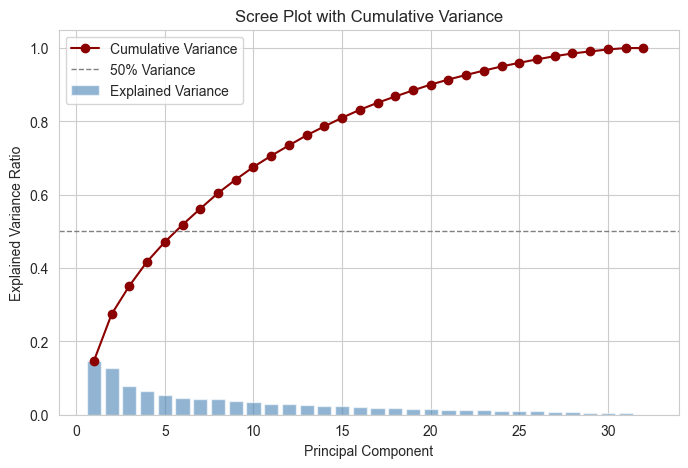

In [23]:
import matplotlib.pyplot as plt
import numpy as np

explained_variances = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variances)

plt.figure(figsize=(8, 5))
x = np.arange(1, len(explained_variances) + 1)

plt.bar(x, explained_variances, alpha=0.6, color='steelblue', label='Explained Variance')

plt.plot(x, cumulative_variance, marker='o', linestyle='-', color='darkred', label='Cumulative Variance')
plt.axhline(y=0.5, color='gray', linestyle='dashed', linewidth=1, label='50% Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot with Cumulative Variance')
plt.legend()

plt.show()

#### Plot 3D ####

In [28]:
import pandas as pd
import plotly.express as px

# Step 1: Extract PCA Loadings (Feature Contributions to Principal Components)
loadings_3d = pca.components_[:3, :]  # Select only the first 3 components

# Create a DataFrame with loadings
df_loadings = pd.DataFrame(loadings_3d.T, columns=['PC1', 'PC2', 'PC3'], index=df_numeric.columns)

# Step 2: Create an interactive 3D scatter plot for loadings
fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text=df_loadings.index,  # Show feature names on hover
                    title='PCA: 3D Loading Plot',
                    labels={'PC1': 'PC1',
                            'PC2': 'PC2',
                            'PC3': 'PC3'},
                    opacity=0.8)

# Make labels visible only on hover
fig.update_traces(marker=dict(size=6, color='red'), textposition='top center', hoverinfo='text')

# Step 3: Save the interactive plot as an HTML file
html_file = "pca_3d_loading_plot.html"
fig.write_html(html_file)

print(f"Loading plot saved as: {html_file} - Open it in a browser to explore!")

# Step 4: Plot
fig.show()

Loading plot saved as: pca_3d_loading_plot.html - Open it in a browser to explore!


3D Loading plot saved as: pca_3d_loading_plot.html - Open it in a browser to explore!


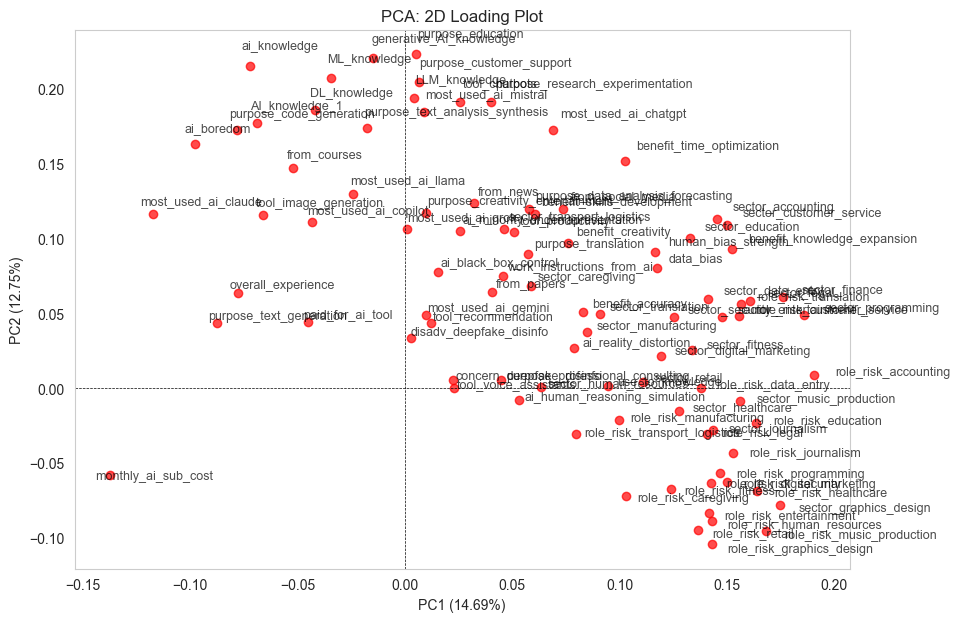

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# === 1. Extract PCA Loadings ===
loadings_3d = pca.components_[:3, :]  # Get the first 3 principal components

# Create a DataFrame with loadings
df_loadings = pd.DataFrame(loadings_3d.T, columns=['PC1', 'PC2', 'PC3'], index=df_numeric.columns)

# === 2. Create a 3D Interactive Loading Plot ===
fig_3d = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                       text=df_loadings.index,  # Show feature names on hover
                       title='PCA: 3D Loading Plot',
                       labels={'PC1': f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)',
                               'PC2': f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)',
                               'PC3': f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)'},
                       opacity=0.8)

# Make labels visible only on hover
fig_3d.update_traces(marker=dict(size=6, color='red'), textposition='top center', hoverinfo='text')

# Save the 3D plot as an HTML file
html_file_3d = "pca_3d_loading_plot.html"
fig_3d.write_html(html_file_3d)

print(f"3D Loading plot saved as: {html_file_3d} - Open it in a browser to explore!")

# Show the 3D plot in the notebook
fig_3d.show()


# === 3. Create a 2D Scatter Plot (PC1 vs PC2) ===
plt.figure(figsize=(10, 7))

# Plot only points (no vectors)
plt.scatter(df_loadings['PC1'], df_loadings['PC2'], color='red', alpha=0.7)

# Add text labels near each point
for i, feature in enumerate(df_loadings.index):
    plt.text(df_loadings.iloc[i, 0] * 1.05, df_loadings.iloc[i, 1] * 1.05,
             feature, fontsize=9, color='black', alpha=0.7)

# Add labels and title
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA: 2D Loading Plot')
plt.grid()

# Show the 2D plot
plt.show()